In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/reduced_special_rice.csv')
df.MONTH = df.MONTH.astype(int)
df["DATE"] = pd.to_datetime(df.YEAR.astype(str) + '/' + df.MONTH.astype(str) + '/01')
df = df.set_index('DATE').asfreq('MS')

In [3]:
df = df.iloc[:, 3:4]

In [4]:
df

,Price / kg
DATE,
1990-01-01,9.00
1990-02-01,9.00
1990-03-01,9.65
1990-04-01,9.70
1990-05-01,9.70
...,...
2020-08-01,51.95
2020-09-01,51.68
2020-10-01,51.13


In [5]:
df.shape

(372, 1)

<Axes: xlabel='DATE'>

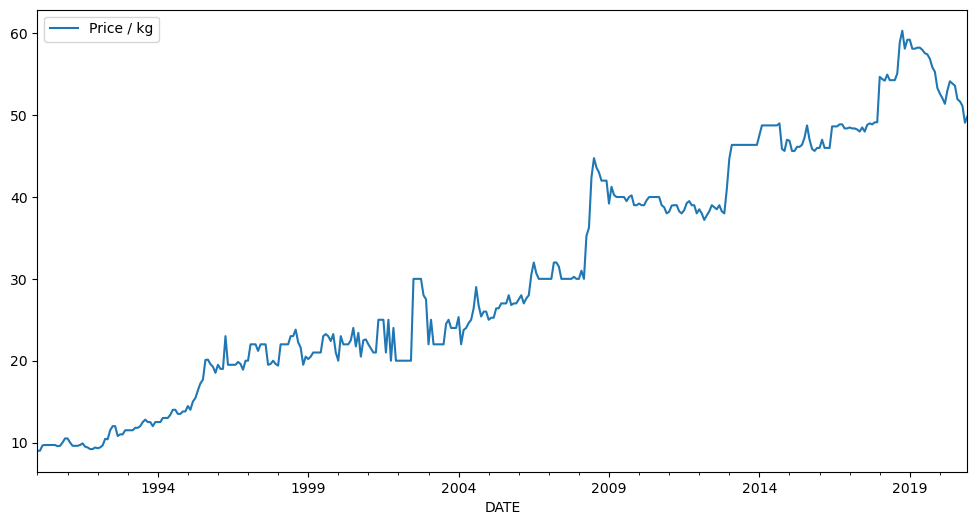

In [6]:
df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

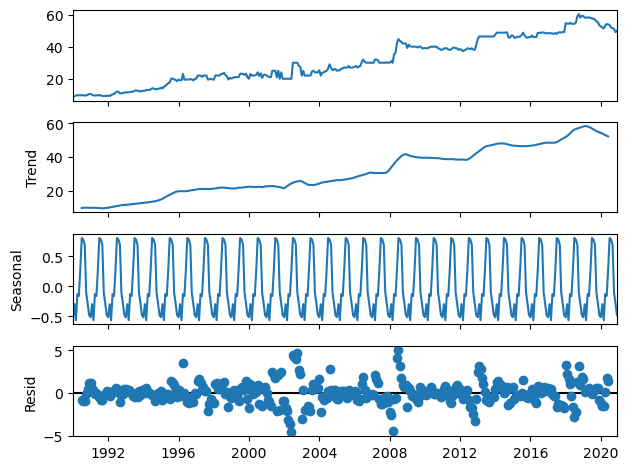

In [8]:
# Run seasonal decomposition again
results = seasonal_decompose(df)
results.plot();

In [9]:
len(df)

372

In [10]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [11]:
print(f"Train Shape: {train.shape} and Test Shape: {test.shape}")

Train Shape: (360, 1) and Test Shape: (12, 1)


In [12]:
test

,Price / kg
DATE,
2020-01-01,52.63
2020-02-01,52.08
2020-03-01,51.39
2020-04-01,53.04
2020-05-01,54.14
2020-06-01,53.87
2020-07-01,53.60
2020-08-01,51.95
2020-09-01,51.68


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(),df.tail()

(            Price / kg
 DATE                  
 1990-01-01        9.00
 1990-02-01        9.00
 1990-03-01        9.65
 1990-04-01        9.70
 1990-05-01        9.70,
             Price / kg
 DATE                  
 2020-08-01       51.95
 2020-09-01       51.68
 2020-10-01       51.13
 2020-11-01       49.07
 2020-12-01       49.89)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
original_value = scaler.inverse_transform(scaled_train)
original_value

array([[ 9.  ],
       [ 9.  ],
       [ 9.65],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.7 ],
       [ 9.55],
       [ 9.6 ],
       [10.  ],
       [10.5 ],
       [10.5 ],
       [10.  ],
       [ 9.6 ],
       [ 9.6 ],
       [ 9.6 ],
       [ 9.7 ],
       [ 9.9 ],
       [ 9.5 ],
       [ 9.4 ],
       [ 9.2 ],
       [ 9.2 ],
       [ 9.4 ],
       [ 9.3 ],
       [ 9.4 ],
       [ 9.65],
       [10.45],
       [10.4 ],
       [11.5 ],
       [12.  ],
       [12.  ],
       [10.8 ],
       [11.  ],
       [11.  ],
       [11.5 ],
       [11.5 ],
       [11.5 ],
       [11.5 ],
       [11.8 ],
       [11.8 ],
       [12.  ],
       [12.5 ],
       [12.8 ],
       [12.5 ],
       [12.5 ],
       [12.  ],
       [12.5 ],
       [12.5 ],
       [12.5 ],
       [13.  ],
       [13.  ],
       [13.  ],
       [13.4 ],
       [14.  ],
       [14.  ],
       [13.5 ],
       [13.5 ],
       [13.8 ],
       [13.8 ],
       [14.46],
       [14.  ],
       [

In [17]:
scaled_train[:80]

array([[0.        ],
       [0.        ],
       [0.01266563],
       [0.01363991],
       [0.01363991],
       [0.01363991],
       [0.01363991],
       [0.01363991],
       [0.01071707],
       [0.01169135],
       [0.01948558],
       [0.02922837],
       [0.02922837],
       [0.01948558],
       [0.01169135],
       [0.01169135],
       [0.01169135],
       [0.01363991],
       [0.01753702],
       [0.00974279],
       [0.00779423],
       [0.00389712],
       [0.00389712],
       [0.00779423],
       [0.00584567],
       [0.00779423],
       [0.01266563],
       [0.02825409],
       [0.02727981],
       [0.04871395],
       [0.05845674],
       [0.05845674],
       [0.03507405],
       [0.03897116],
       [0.03897116],
       [0.04871395],
       [0.04871395],
       [0.04871395],
       [0.04871395],
       [0.05455963],
       [0.05455963],
       [0.05845674],
       [0.06819953],
       [0.07404521],
       [0.06819953],
       [0.06819953],
       [0.05845674],
       [0.068

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
# define generator 
n_input = 359
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
# Get the first batch
X, y = generator[0]

# Reshape X to 2D for inverse transformation
# X shape is (1, n_input, n_features)
X_reshaped = X.reshape(-1, 1)  # This will make it (n_input, n_features)

# Inverse transform to get original values
original_values = scaler.inverse_transform(X_reshaped)

# Print results
print(f'Given the Array (scaled): \n{X.flatten()}')
print(f'Original values: \n{original_values.flatten()}')

Given the Array (scaled): 
[0.         0.         0.01266563 0.01363991 0.01363991 0.01363991
 0.01363991 0.01363991 0.01071707 0.01169135 0.01948558 0.02922837
 0.02922837 0.01948558 0.01169135 0.01169135 0.01169135 0.01363991
 0.01753702 0.00974279 0.00779423 0.00389712 0.00389712 0.00779423
 0.00584567 0.00779423 0.01266563 0.02825409 0.02727981 0.04871395
 0.05845674 0.05845674 0.03507405 0.03897116 0.03897116 0.04871395
 0.04871395 0.04871395 0.04871395 0.05455963 0.05455963 0.05845674
 0.06819953 0.07404521 0.06819953 0.06819953 0.05845674 0.06819953
 0.06819953 0.06819953 0.07794232 0.07794232 0.07794232 0.08573655
 0.0974279  0.0974279  0.08768511 0.08768511 0.09353079 0.09353079
 0.10639127 0.0974279  0.11710834 0.12548714 0.14380359 0.16036633
 0.16913484 0.21609509 0.21687451 0.20615744 0.19992206 0.18550273
 0.2045986  0.19485581 0.19485581 0.27279813 0.2045986  0.2045986
 0.2045986  0.2045986  0.21141855 0.20654716 0.19290725 0.21434139
 0.21434139 0.25331255 0.25331255 0.

In [21]:
y_reshaped = y.reshape(-1, 1)  # This will make it (n_input, n_features)

# Inverse transform to get original values
original_values = scaler.inverse_transform(y_reshaped)

print(f'Predict this y: \n {y} \n')
print(f'Original values: \n{original_values.flatten()}')

Predict this y: 
 [[0.86340608]] 

Original values: 
[53.31]


In [22]:
X.shape

(1, 359, 1)

In [23]:
# We do the same thing, but now instead for 12 months
#n_input = 12
#generator = TimeseriesGenerator(scaled_train[:, 1:2], scaled_train[:, 1:2], length=n_input, batch_size=1)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\Fzkn4\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50


C:\Users\Fzkn4\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.7001
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.6612
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.6242
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.5897
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 0.5592
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.5310
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.5031
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.4752
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.4473
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 0.4191
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.3900
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.3607
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.3302
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.2977
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.2633
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━

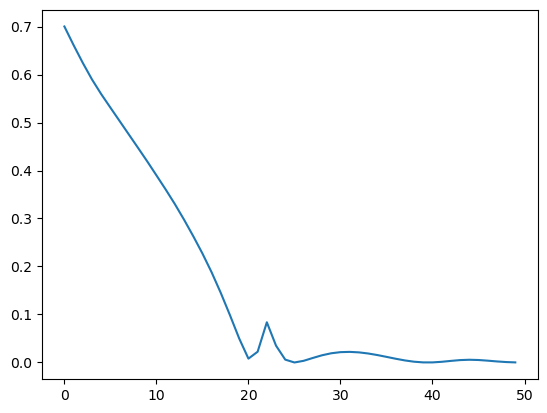

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
last_train_batch = scaled_train[-359:]

In [30]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [31]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


array([[0.85711247]], dtype=float32)

In [32]:
scaled_test[0]

array([0.85015588])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [34]:
test_predictions

[array([0.85711247], dtype=float32),
 array([0.85287696], dtype=float32),
 array([0.84828997], dtype=float32),
 array([0.8434257], dtype=float32),
 array([0.8383489], dtype=float32),
 array([0.8331081], dtype=float32),
 array([0.82774025], dtype=float32),
 array([0.8222734], dtype=float32),
 array([0.81672895], dtype=float32),
 array([0.8111241], dtype=float32),
 array([0.80547225], dtype=float32),
 array([0.7997846], dtype=float32)]

In [35]:
test.head()

,Price / kg
DATE,
2020-01-01,52.63
2020-02-01,52.08
2020-03-01,51.39
2020-04-01,53.04
2020-05-01,54.14


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
test['Predictions'] = true_predictions

C:\Users\Fzkn4\AppData\Local\Temp\ipykernel_6056\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

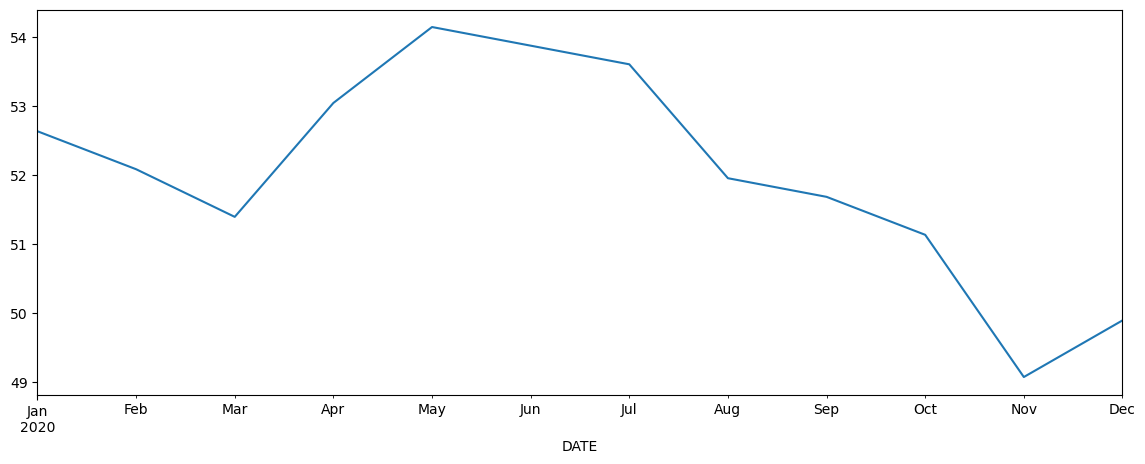

In [38]:
test["Price / kg"].plot(figsize=(14,5))

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Price / kg'], test['Predictions']))
print(f'RMSE: {rmse}')

# Calculate MSE
mse = mean_squared_error(test['Price / kg'], test['Predictions'])
print(f'MSE: {mse}')

# Calculate MAE
mae = mean_absolute_error(test['Price / kg'], test['Predictions'])
print(f'MAE: {mae}')

RMSE: 1.2570046161665973
MSE: 1.5800606050641344
MAE: 1.0615650767087932


In [40]:
# Extend the test dataset to include January 1, 2025
future_dates = pd.date_range(start='2025-01-01', periods=1, freq='MS')
future_predictions = []

# Loop to generate predictions for future dates
for _ in range(len(future_dates)):
    current_pred = model.predict(last_train_batch)[0]
    future_predictions.append(current_pred)
    
    # Update the current batch
    current_batch = np.append(last_train_batch[:, 1:, :], [[current_pred]], axis=1)
    last_train_batch = current_batch

# Inverse transform to get actual predicted prices
actual_future_predictions = scaler.inverse_transform(future_predictions)

# Output the prediction for January 1, 2025
predicted_price_jan_2025 = actual_future_predictions[0][0]
print(f"Predicted Price:\n{predicted_price_jan_2025}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Price:
52.98701182126999
